In [5]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:

df = pd.read_csv("forestfires.csv")
print(df.head())
print(df.info())
print(df.describe())


   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null

In [3]:
# Check total missing values per column
print(df.isnull().sum())


X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64


In [7]:
df.shape

(517, 13)

In [8]:
df.columns

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')

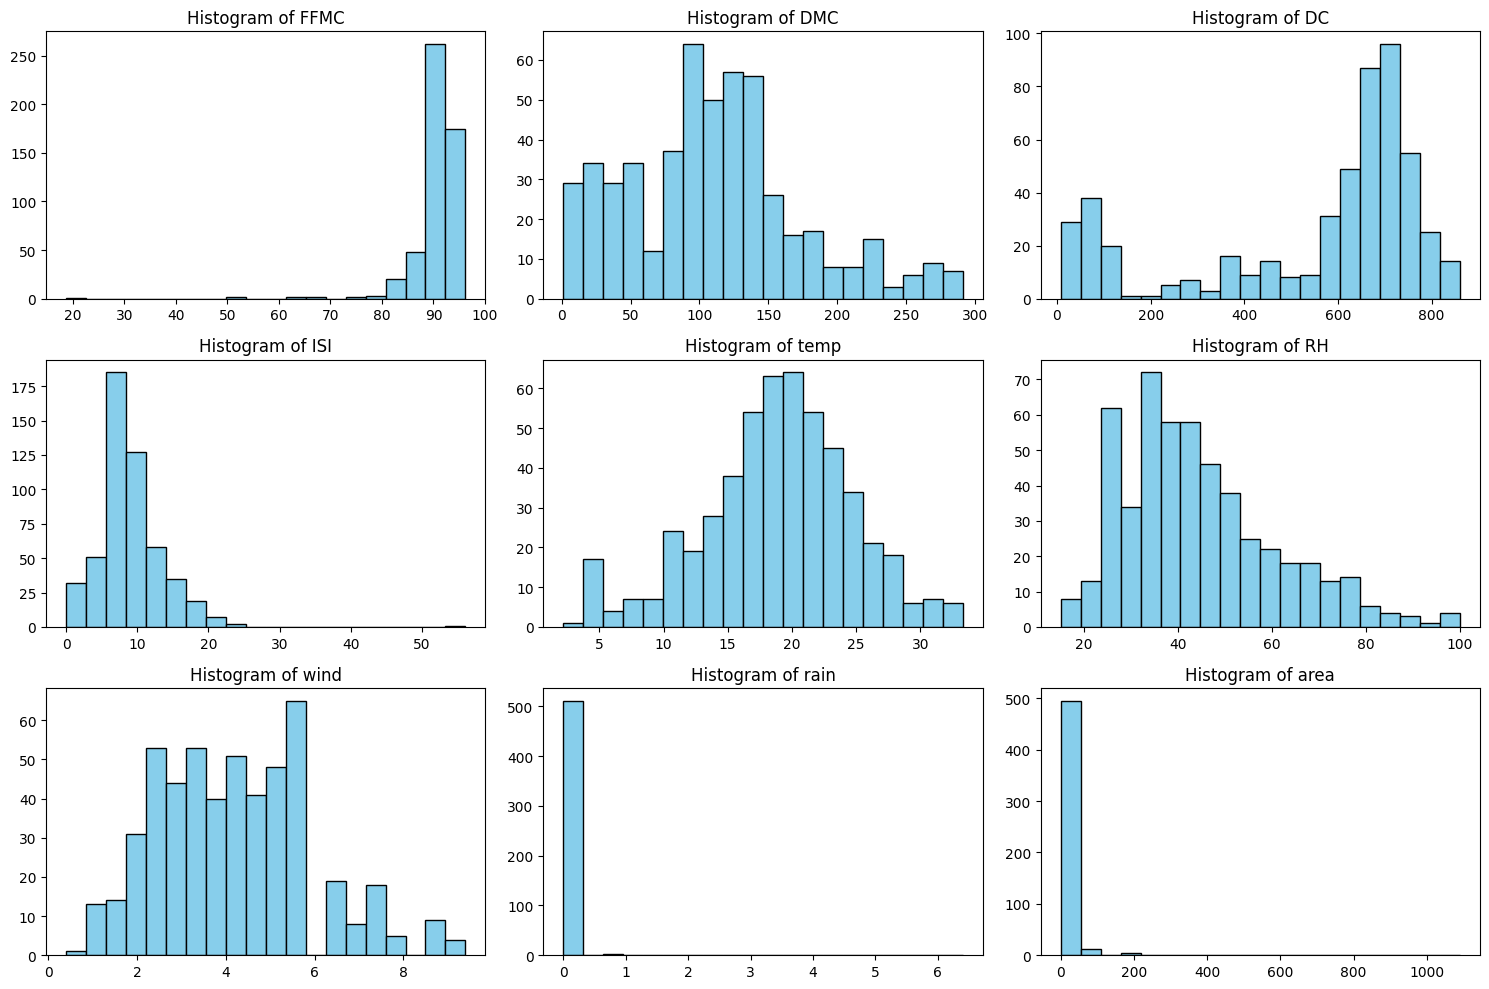

In [10]:
#univariate analysis 
numeric_cols = ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']
plt.figure(figsize=(15,10))
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 3, i+1)
    plt.hist(df[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()


In [12]:
# 1 = fire occurred (area > 0), 0 = no fire
df['fire'] = (df['area'] > 0).astype(int)

# Check if it worked
print(df[['area','fire']].head())


   area  fire
0   0.0     0
1   0.0     0
2   0.0     0
3   0.0     0
4   0.0     0


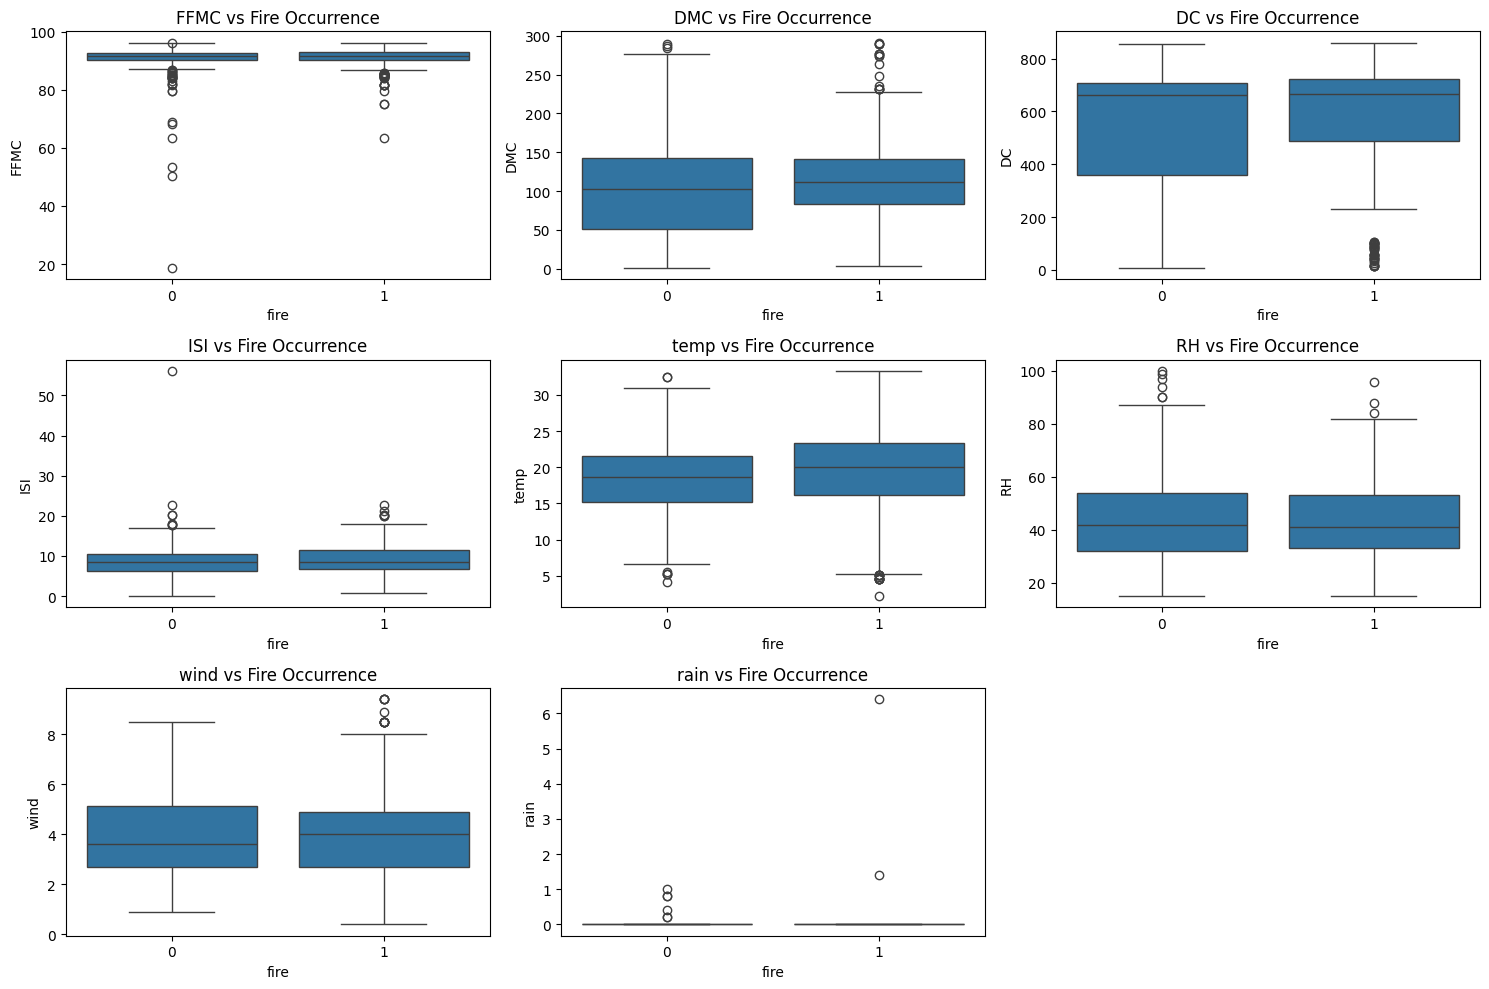

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']

plt.figure(figsize=(15,10))
for i, col in enumerate(numeric_cols):
    plt.subplot(3,3,i+1)
    sns.boxplot(x='fire', y=col, data=df)
    plt.title(f'{col} vs Fire Occurrence')
plt.tight_layout()
plt.show()


          FFMC       DMC        DC       ISI      temp        RH      wind  \
FFMC  1.000000  0.382619  0.330512  0.531805  0.431532 -0.300995 -0.028485   
DMC   0.382619  1.000000  0.682192  0.305128  0.469594  0.073795 -0.105342   
DC    0.330512  0.682192  1.000000  0.229154  0.496208 -0.039192 -0.203466   
ISI   0.531805  0.305128  0.229154  1.000000  0.394287 -0.132517  0.106826   
temp  0.431532  0.469594  0.496208  0.394287  1.000000 -0.527390 -0.227116   
RH   -0.300995  0.073795 -0.039192 -0.132517 -0.527390  1.000000  0.069410   
wind -0.028485 -0.105342 -0.203466  0.106826 -0.227116  0.069410  1.000000   
rain  0.056702  0.074790  0.035861  0.067668  0.069491  0.099751  0.061119   
area  0.040122  0.072994  0.049383  0.008258  0.097844 -0.075519  0.012317   

          rain      area  
FFMC  0.056702  0.040122  
DMC   0.074790  0.072994  
DC    0.035861  0.049383  
ISI   0.067668  0.008258  
temp  0.069491  0.097844  
RH    0.099751 -0.075519  
wind  0.061119  0.012317  
rai

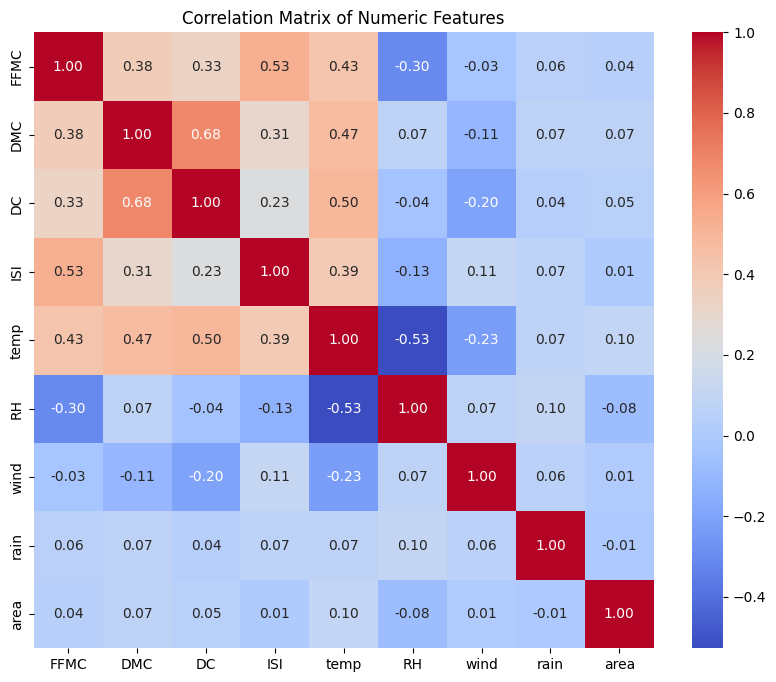

In [14]:
# Select numeric features
numeric_cols = ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']

# Compute correlation matrix
corr_matrix = df[numeric_cols].corr()

# Print correlation matrix
print(corr_matrix)

# Visualize correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numeric Features")
plt.show()


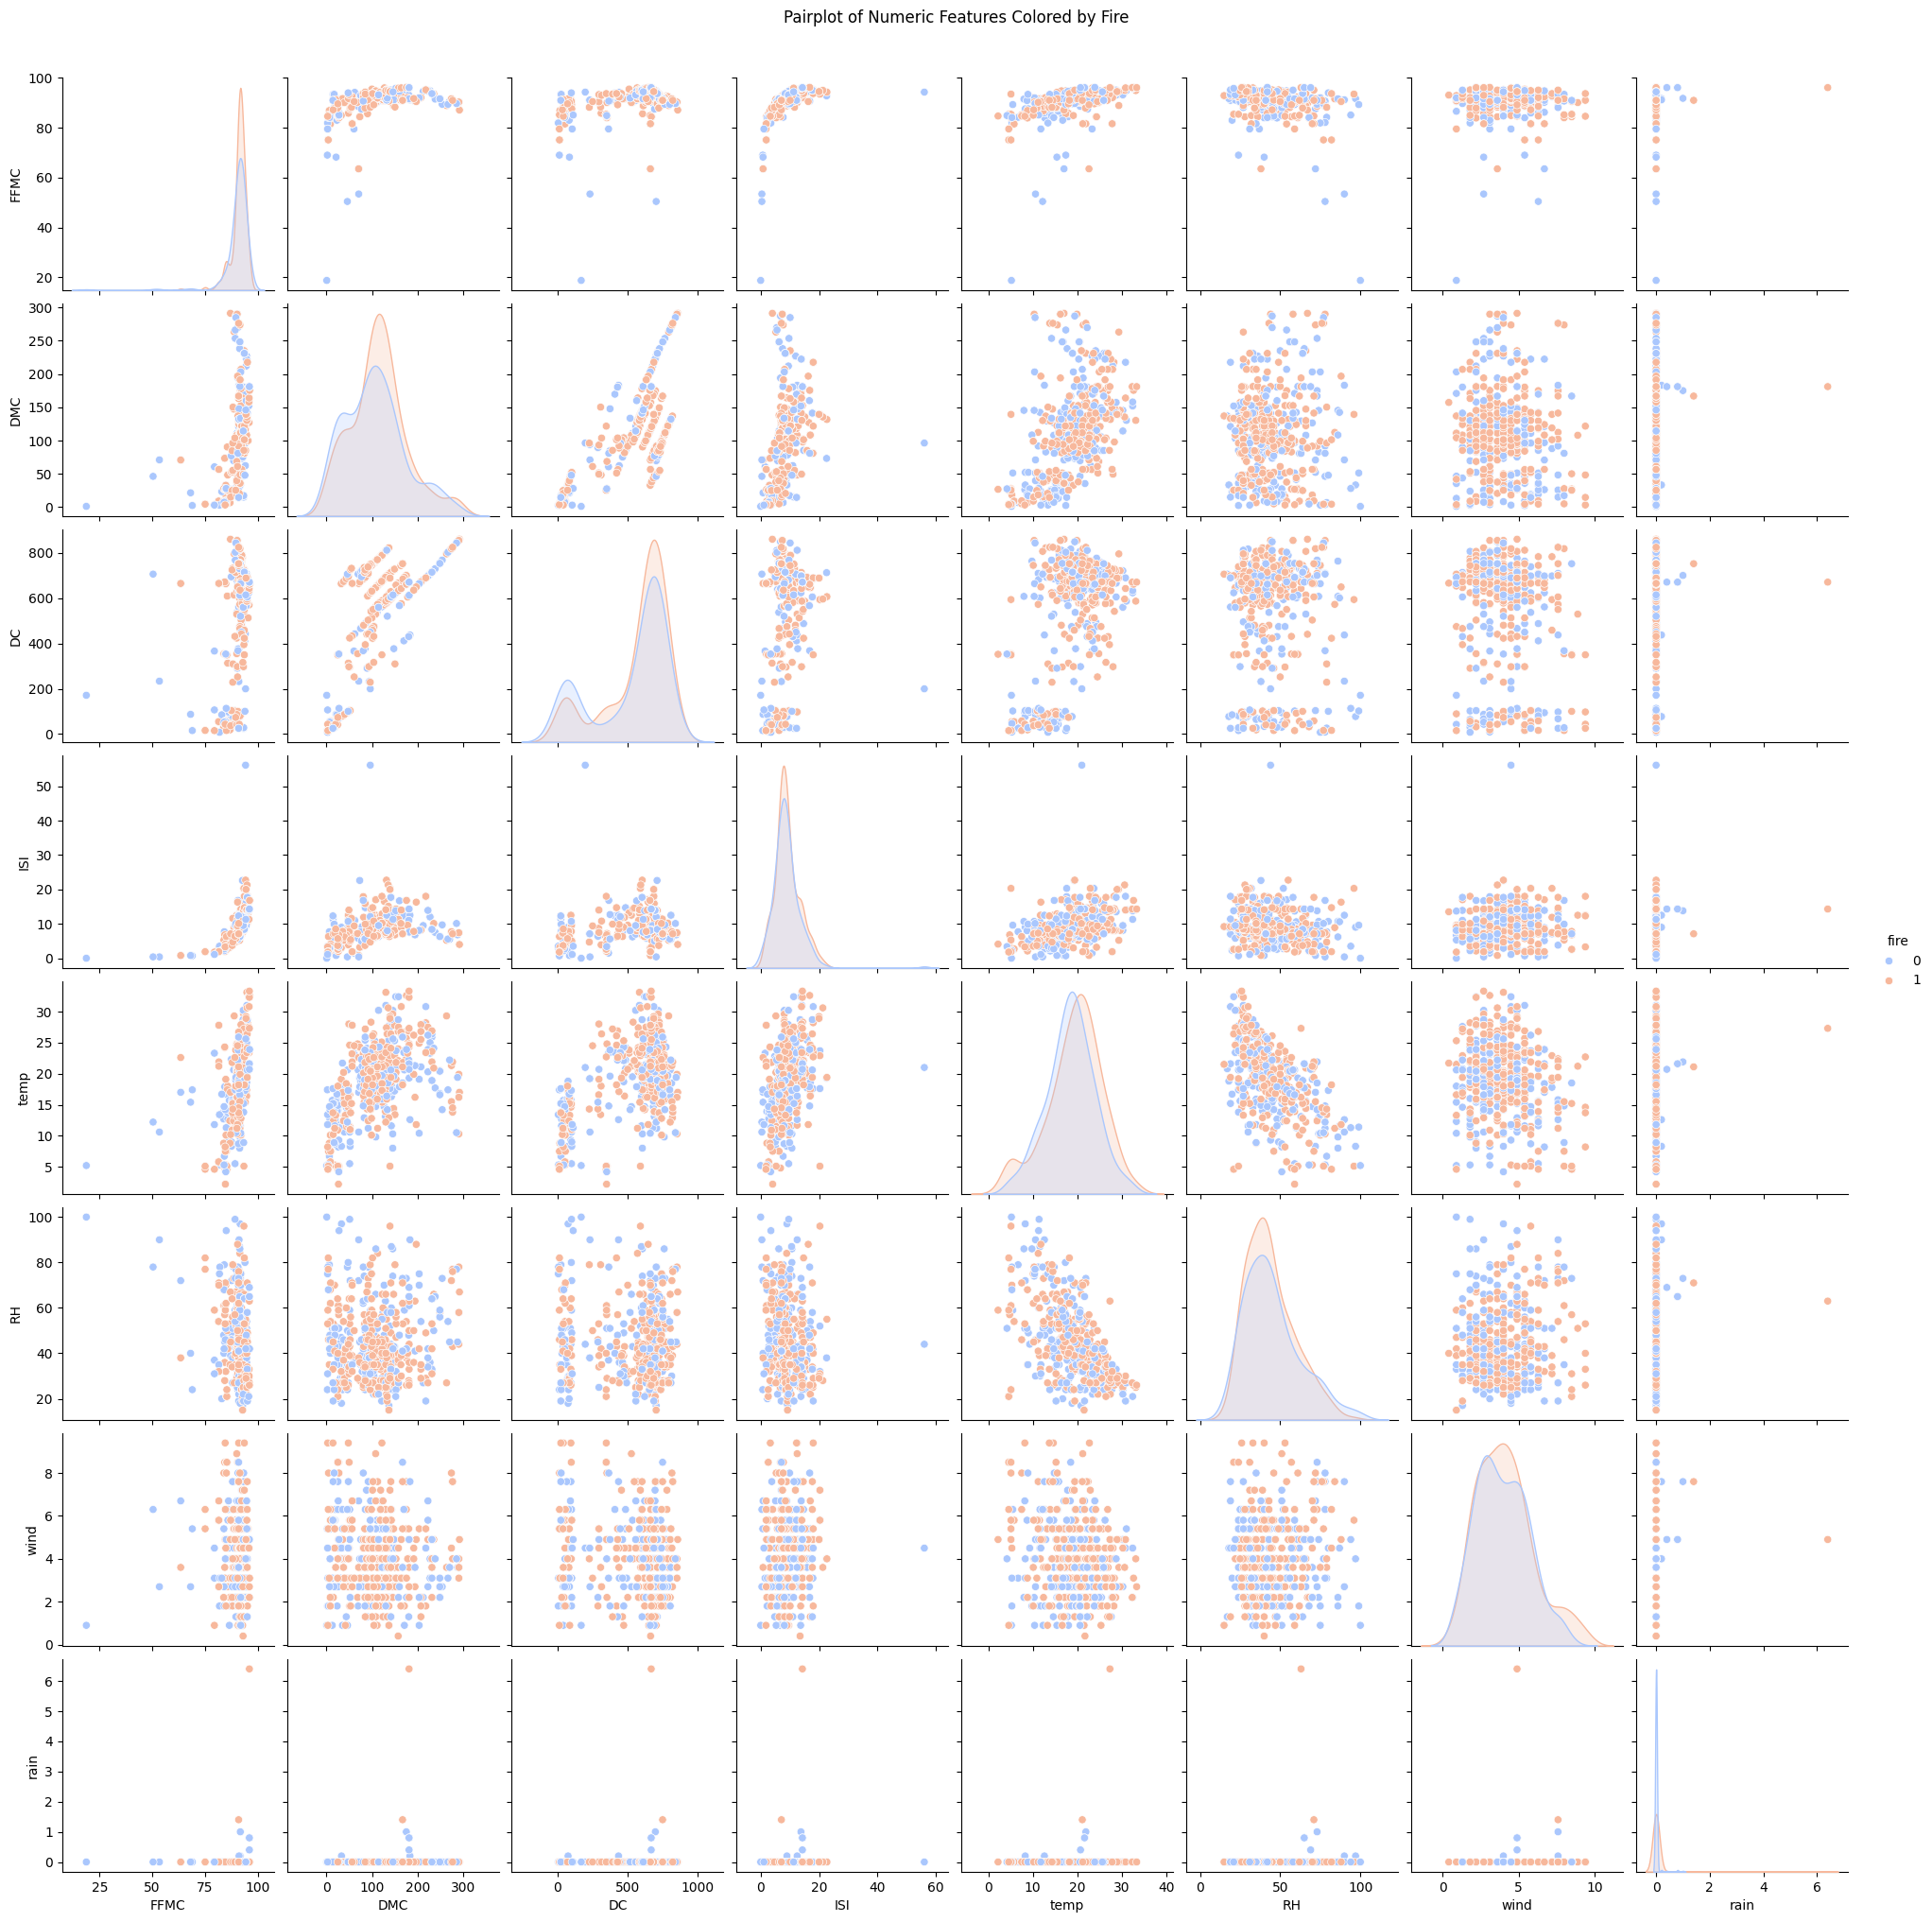

In [23]:
# Select numeric features for pairplot
numeric_cols = ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']

# Include fire column for coloring
pairplot_cols = numeric_cols + ['fire']

# Create pairplot
sns.pairplot(df[pairplot_cols], hue='fire', palette='coolwarm', diag_kind='kde')
plt.suptitle("Pairplot of Numeric Features Colored by Fire", y=1.02)
plt.show()


In [24]:
# Data Preprocessing
le = LabelEncoder()
categorical_cols = ['month', 'day'] # Common categorical columns in a forest fire dataset
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [25]:
# Feature and target selection
X = df.drop('area', axis=1)
y = df['area']

In [26]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
 X_train.shape

(413, 13)

In [28]:
X_test.shape

(104, 13)

In [29]:

# Scale numerical features
num_cols = ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [30]:
X_train

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,fire
329,4,3,11,2,0.280286,-0.150282,0.810272,-0.095838,0.797602,-1.059419,0.001631,-0.067817,1
173,4,4,11,1,0.061652,0.217866,0.549136,-0.455434,-0.205272,-0.335215,-1.008923,-0.067817,1
272,2,5,1,5,0.263468,0.614919,0.435442,1.419602,0.227001,0.147588,0.001631,-0.067817,1
497,3,4,1,5,0.936186,1.048482,0.487669,1.419602,2.319206,-1.059419,-1.008923,-0.067817,1
182,5,4,3,3,-0.627884,-1.469227,-2.014816,-1.251682,-1.121692,0.509690,-1.008923,-0.067817,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,4,5,11,0,0.633463,-0.411941,0.572437,1.830569,-0.205272,-0.455916,-0.222936,-0.067817,0
106,4,5,7,4,0.145742,-1.239514,-1.910361,-0.327007,-0.118818,-0.938719,-0.503646,-0.067817,0
270,2,2,1,5,0.263468,0.614919,0.435442,1.419602,0.503656,0.690741,-0.503646,-0.067817,1
435,2,5,5,2,0.044834,-0.418026,-0.695879,-0.815030,0.849475,0.388990,-1.233490,-0.067817,0
